In [1]:
import timeit
import numpy as np
from functools import partial
import matplotlib.pyplot as plt

from skimage.filters import gaussian
import pyclesperanto_prototype as clesp_p
from pyclesperanto import Clesperanto

pyclic = Clesperanto()
pyclic.set_wait_for_kernel_to_finish()

clesp_p.select_device()
clesp_p.set_wait_for_kernel_finish()

In [2]:
def benchmark_clesp_p_size(target_function, sigma):
    """
    Tests a function on a couple of image sizes and returns times taken for processing.
    """
    sizes = np.arange(1, 100) * 10
    benchmark_data = []

    for size in sizes:
        # make new data
        image = np.zeros((size, size))
        gpu_image = clesp_p.push(image)
        gpu_result = clesp_p.create(image.shape)
        # bind target function to given image
        partial_function = partial(target_function, gpu_image, gpu_result, sigma)
        # warmup       
        warm_up_time_in_s = timeit.timeit(partial_function, number=10)
        # measure execution time
        time_in_s = timeit.timeit(partial_function, number=20)
        # store results
        benchmark_data.append([size, time_in_s])

    return np.asarray(benchmark_data)

def benchmark_pyclic_size(target_function, sigma):
    """
    Tests a function on a couple of image sizes and returns times taken for processing.
    """
    sizes = np.arange(1, 100) * 10
    benchmark_data = []

    for size in sizes:
        # make new data
        image = np.zeros((size, size))
        gpu_image = pyclic.push(image)
        gpu_result = pyclic.create(image.shape)
        # bind target function to given image
        partial_function = partial(target_function, gpu_image, gpu_result, sigma)
        # warmup       
        warm_up_time_in_s = timeit.timeit(partial_function, number=10)
        # measure execution time
        time_in_s = timeit.timeit(partial_function, number=20)
        # store results
        benchmark_data.append([size, time_in_s])

    return np.asarray(benchmark_data)

def benchmark_skimage_size(target_function, sigma):
    """
    Tests a function on a couple of image sizes and returns times taken for processing.
    """
    sizes = np.arange(1, 100) * 10
    benchmark_data = []

    for size in sizes:
        # make new data
        image = np.zeros((size, size))

        # bind target function to given image
        partial_function = partial(target_function, image, sigma)
        # warmup       
        warm_up_time_in_s = timeit.timeit(partial_function, number=10)
        # measure execution time
        time_in_s = timeit.timeit(partial_function, number=20)
        # store results
        benchmark_data.append([size, time_in_s])

    return np.asarray(benchmark_data)

def benchmark_clesp_p_sigma(target_function, size):
    """
    Tests a function on a couple of image sizes and returns times taken for processing.
    """
    sigmas = np.arange(1, 30)
    benchmark_data = []
    
    for sigma in sigmas:
        # make new data
        image = np.zeros((size, size))
        gpu_image = clesp_p.push(image)
        gpu_result = clesp_p.create(image.shape)
        # bind target function to given image
        partial_function = partial(target_function, gpu_image, gpu_result, sigma)
        # warmup       
        warm_up_time_in_s = timeit.timeit(partial_function, number=10)
        # measure execution time
        time_in_s = timeit.timeit(partial_function, number=20)
        # store results
        benchmark_data.append([sigma, time_in_s])

    return np.asarray(benchmark_data)

def benchmark_pyclic_sigma(target_function, size):
    """
    Tests a function on a couple of image sizes and returns times taken for processing.
    """
    sigmas = np.arange(1, 30)
    benchmark_data = []

    for sigma in sigmas:
        # make new data
        image = np.zeros((size, size))
        gpu_image = pyclic.push(image)
        gpu_result = pyclic.create(image.shape)
        # bind target function to given image
        partial_function = partial(target_function, gpu_image, gpu_result, sigma)
        # warmup       
        warm_up_time_in_s = timeit.timeit(partial_function, number=10)
        # measure execution time
        time_in_s = timeit.timeit(partial_function, number=20)
        # store results
        benchmark_data.append([sigma, time_in_s])

    return np.asarray(benchmark_data)

def benchmark_skimage_sigma(target_function, size):
    """
    Tests a function on a couple of image sizes and returns times taken for processing.
    """
    sigmas = np.arange(1, 30)
    benchmark_data = []

    for sigma in sigmas:
        # make new data
        image = np.zeros((size, size))

        # bind target function to given image
        partial_function = partial(target_function, image, sigma)
        # warmup       
        warm_up_time_in_s = timeit.timeit(partial_function, number=10)
        # measure execution time
        time_in_s = timeit.timeit(partial_function, number=20)
        # store results
        benchmark_data.append([sigma, time_in_s])

    return np.asarray(benchmark_data)

## Benchmark : gaussian blur

In [3]:
def pyclic_gaussian_blur(gpu_image, gpu_result, sigma):
    pyclic.gaussian_blur(input_image=gpu_image, output_image=gpu_result, sigma_x=sigma, sigma_y=sigma, sigma_z=sigma)

def clesp_p_gaussian_blur(gpu_image, gpu_result, sigma):
    clesp_p.gaussian_blur(source=gpu_image, destination=gpu_result, sigma_x=sigma, sigma_y=sigma, sigma_z=sigma)
    
def skimage_gaussian_blur(image, sigma):
    gaussian(image, sigma)

In [4]:
sigma=10
time_pyclic_size = benchmark_pyclic_size(pyclic_gaussian_blur, sigma)
time_clesp_p_size = benchmark_clesp_p_size(clesp_p_gaussian_blur, sigma)
time_skimage_size = benchmark_skimage_size(skimage_gaussian_blur, sigma)

In [5]:
size=256
time_pyclic_sigma = benchmark_pyclic_sigma(pyclic_gaussian_blur, size)
time_clesp_p_sigma = benchmark_clesp_p_sigma(clesp_p_gaussian_blur, size)
time_skimage_sigma = benchmark_skimage_sigma(skimage_gaussian_blur, size)

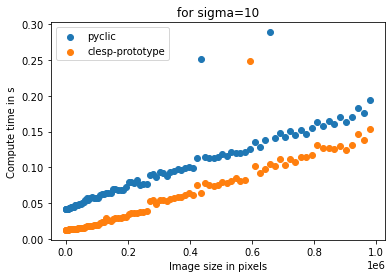

In [8]:
plt.scatter(time_pyclic_size[:,0] ** 2, time_pyclic_size[:,1])
plt.scatter(time_clesp_p_size[:,0] ** 2, time_clesp_p_size[:,1])
# plt.scatter(time_skimage_size[:,0] ** 2, time_skimage_size[:,1])

plt.legend(["pyclic", "clesp-prototype", "skimage"])
plt.xlabel("Image size in pixels")
plt.ylabel("Compute time in s")
plt.title("for sigma=10")
plt.show()

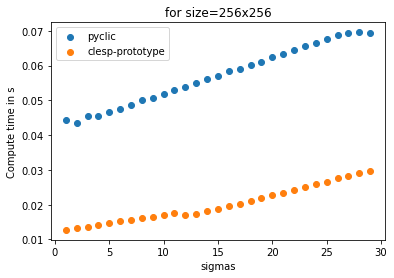

In [9]:
plt.scatter(time_pyclic_sigma[:,0], time_pyclic_sigma[:,1])
plt.scatter(time_clesp_p_sigma[:,0], time_clesp_p_sigma[:,1])
# plt.scatter(time_skimage_sigma[:,0], time_skimage_sigma[:,1])

plt.legend(["pyclic", "clesp-prototype", "skimage"])
plt.xlabel("sigmas")
plt.ylabel("Compute time in s")
plt.title("for size=256x256")
plt.show()